In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal
from numpy import linalg
from scipy import ndimage
from obspy import read
import pandas

In /Users/anagarcia-ceballos/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/anagarcia-ceballos/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/anagarcia-ceballos/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [24]:
# Read in csv file either from shake table or your accelerometer
#Change file
ST = pandas.read_csv('Shake_table_data', sep='	', header=None)
#Directions
x = ST[1].values
y = ST[2].values
z = ST[3].values

26789


In [25]:
# Fourier transform and spectograms

# Adjust frequency base on shake table settings or ion code for accelerometer
sr = 10
time = len(x)/ sr
tline = np.arange(0, time, 1/sr)
freq = np.fft.fftfreq(len(x),1./sr)
Y = np.fft.fft(x)/len(x)
Y_shift = np.abs(np.fft.fftshift(Y))

time1 = len(y)/ sr
tline = np.arange(0, time1, 1/sr)
freq1 = np.fft.fftfreq(len(y),1./sr)
Y1 = np.fft.fft(y)/len(y)
Y1_shift = np.abs(np.fft.fftshift(Y1))

time2 = len(z)/ sr
tline = np.arange(0, time2, 1/sr)
freq2 = np.fft.fftfreq(len(z),1./sr)
Y2 = np.fft.fft(z)/len(z)
Y2_shift = np.abs(np.fft.fftshift(Y2))

f_XX, t_XX, S_XX = signal.spectrogram(x,sr)
f_YY, t_YY, S_YY = signal.spectrogram(y,sr)
f_ZZ, t_ZZ, S_ZZ = signal.spectrogram(z,sr)

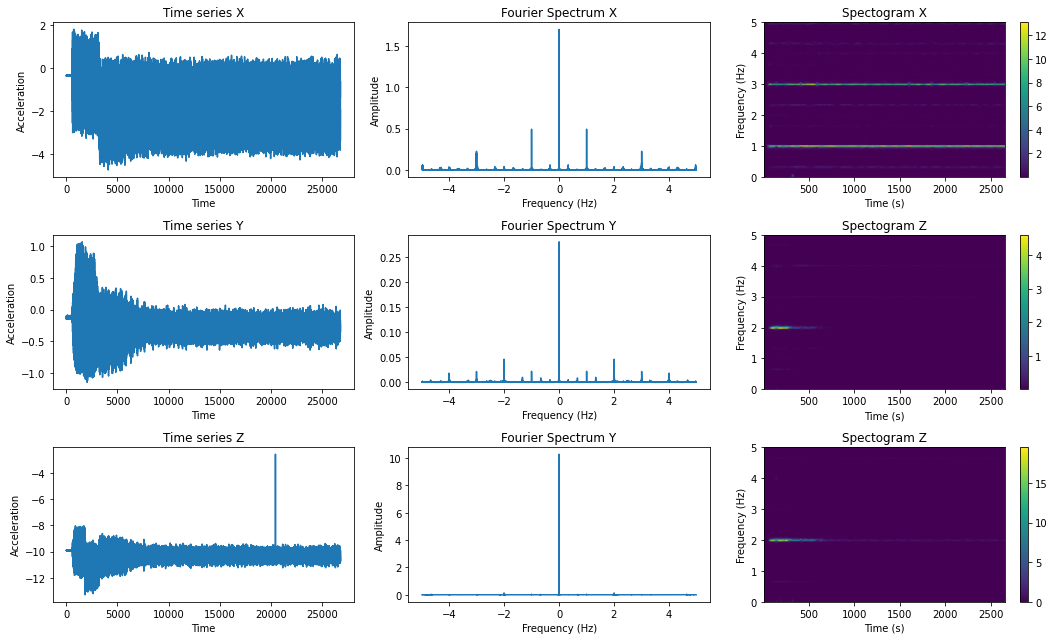

In [27]:
# Plots

# X direction
plt.figure(figsize=(15,9))
plt.subplot(331)
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Time series X')

plt.subplot(332)
plt.plot(np.fft.fftshift(freq), Y_shift)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Spectrum X')


plt.subplot(333)
plt.pcolormesh(t_XX,f_XX,S_XX,shading='gouraud')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.title('Spectogram X')

# Y Direction
plt.subplot(334)
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Time series Y')

plt.subplot(335)
plt.plot(np.fft.fftshift(freq1), Y1_shift)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Spectrum Y')


plt.subplot(336)
plt.pcolormesh(t_YY,f_YY,S_YY,shading='gouraud')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.title('Spectogram Z')

# Z Direction
plt.subplot(337)
plt.plot(z)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Time series Z')

plt.subplot(338)
plt.plot(np.fft.fftshift(freq2), Y2_shift)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Spectrum Y')


plt.subplot(339)
plt.pcolormesh(t_ZZ,f_ZZ,S_ZZ,cmap='viridis', vmax=100)
plt.pcolormesh(t_ZZ,f_ZZ,S_ZZ,shading='gouraud')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.title('Spectogram Z')
plt.tight_layout()



plt.show()